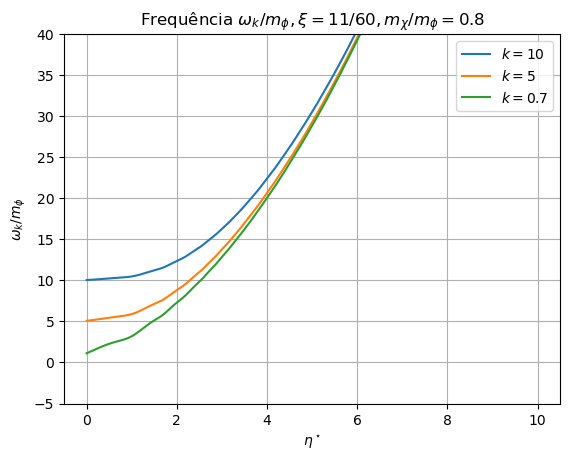

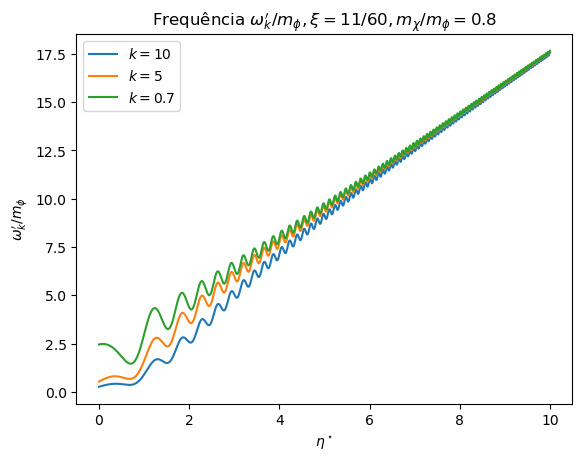

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Definindo parâmetros
t_max = 10
num_points = 1000
t = np.linspace(0, t_max, num_points)



# Parâmetros para cálculos
k = 10
k2 = 5
k3 = 0.7
mx = 0.8  #razão m_chi/n=m_phi
xi = 11/ 60

a = (t + 1) ** 2

R = (600/(1.5335+t)**6)*(0.5*(1 - 3*np.cos(0.37*(t+1.5335)**3)))

w = np.sqrt(k ** 2 + (a ** 2) * mx ** 2 + (a ** 2) * (xi - 1 / 6) * R)
w2 = np.sqrt(k2 ** 2 + (a ** 2) * mx ** 2 + (a ** 2) * (xi - 1 / 6) * R)
w3 = np.sqrt(k3 ** 2 + (a ** 2) * mx ** 2 + (a ** 2) * (xi - 1 / 6) * R)

# Plotando o gráfico
plt.plot(t, w, label='$k=10$')
plt.plot(t, w2, label='$k=5$')
plt.plot(t, w3, label='$k=0.7$')
plt.xlabel(r'$\eta^\star$')
plt.ylabel('$\omega_k / m_\phi$')
plt.title(r'Frequência $\omega_k / m_\phi , \xi = 11/60 , m_\chi/m_\phi = 0.8$')
plt.ylim(-5, 40)
plt.legend()
plt.grid()
plt.show()
wp = 0.5*(1/w)*(4*(mx**2)*((1+t)**3) + 300*(xi-1/6)*(9*np.sin(0.37*(1.5335+t)**3)*0.37*(((1+t)**4)/(1.5335 + t)**4) - 2*(1-3*np.cos(0.37*(1.5335+t)**3))*(((t*(1+t)**3)/(1.5335 + t)**7))))
wp2= 0.5*(1/w2)*(4*(mx**2)*((1+t)**3) + 300*(xi-1/6)*(9*np.sin(0.37*(1.5335+t)**3)*0.37*(((1+t)**4)/(1.5335 + t)**4) - 2*(1-3*np.cos(0.37*(1.5335+t)**3))*(((t*(1+t)**3)/(1.5335 + t)**7))))
wp3 = 0.5*(1/w3)*(4*(mx**2)*((1+t)**3) + 300*(xi-1/6)*(9*np.sin(0.37*(1.5335+t)**3)*0.37*(((1+t)**4)/(1.5335 + t)**4) - 2*(1-3*np.cos(0.37*(1.5335+t)**3))*(((t*(1+t)**3)/(1.5335 + t)**7))))
plt.plot(t, wp, label='$k=10$')
plt.plot(t, wp2, label='$k=5$')
plt.plot(t, wp3, label='$k=0.7$')
plt.xlabel(r'$\eta^\star$')
plt.ylabel(r'$\omega_k^\prime / m_\phi$')
plt.title(r'Frequência $\omega_k ^\prime / m_\phi , \xi = 11/60 , m_\chi/m_\phi = 0.8$')
#plt.xlim(1,10)
#plt.ylim(-1,40)
plt.legend()
plt.show()



#(((1+t)**4)/(1.5335 + t)**4)

#((t*(1+t)**3)/(1.5335 + t)**7)

Sistema de equações diferenciais: $$\alpha_k '= -i\omega_k \alpha_k + \frac{\omega_k '}{2\omega_k} \beta_k$$

$$\beta_k '= i\omega_k \beta_k + \frac{\omega_k '}{2\omega_k} \alpha_k$$

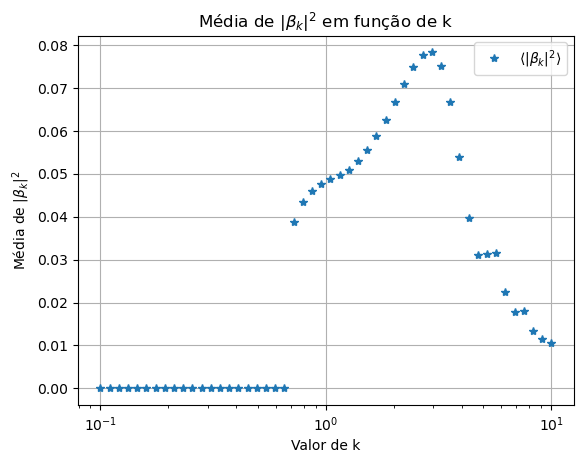

Densidade: 13.665636236274976


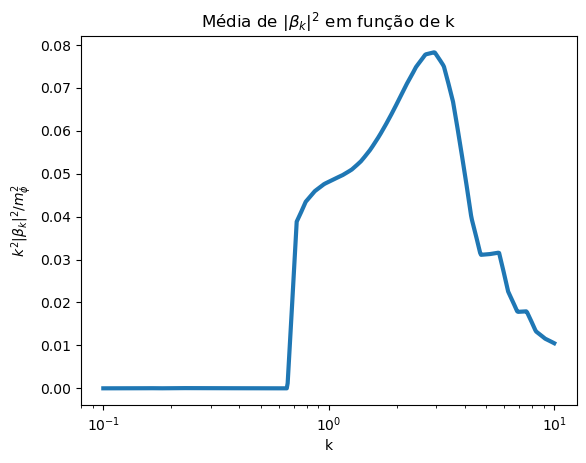

In [33]:
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy.integrate as integrate

# Parâmetros constantes
k_values = np.logspace(-1,1 , num=50)  # Lista de valores de k
mx = 0.08  # Valor de mx
xi = 11/60  # Valor de xi

# Funções para "a" e "R" dependentes do tempo
def a_function(t):
    return (t+1)**2

def R_function(t):
    return (600/(1.5335+t)**6)*(0.5*(1 - 3*np.cos(0.37*(t+1.5335)**3)))

# Funções para as equações diferenciais
def derivative(y, t, k):
    alpha_real, alpha_imag, beta_real, beta_imag = y
   
    a = a_function(t)
    R = R_function(t)
   
    omega_k = cmath.sqrt(k**2 + (a**2) * mx**2 + (a**2)*(xi - 1/6) * R)
   
    omega_kr = omega_k.real
    omega_ki = omega_k.imag
   
    omegap_k = 0.5*(1/omega_k)*(4*(mx**2)*((1+t)**3) + 300*(xi-1/6)*(9*np.sin(0.37*(1.5335+t)**3)*0.37*(((1+t)**4)/(1.5335 + t)**4) - 2*(1-3*np.cos(0.37*(1.5335+t)**3))*(((t*(1+t)**3)/(1.5335 + t)**7))))
   
    deltar = (omegap_k / (2*omega_k)).real

    alpha_real_prime = omega_kr * alpha_imag + omega_ki*alpha_real + deltar*beta_real
    alpha_imag_prime = -omega_kr * alpha_real + omega_ki*alpha_imag + deltar*beta_imag
    beta_real_prime = -omega_kr * beta_imag - omega_ki*beta_real + deltar*alpha_real
    beta_imag_prime = omega_kr * beta_real - omega_ki*beta_imag + deltar*alpha_imag
   
    return [alpha_real_prime, alpha_imag_prime, beta_real_prime, beta_imag_prime]

# Condições iniciais
alpha_real0 = 1.0
alpha_imag0 = 0.0
beta_real0 = 0.0
beta_imag0 = 0.0
initial_conditions = [alpha_real0, alpha_imag0, beta_real0, beta_imag0]

# Resolvendo o sistema de equações diferenciais usando odeint para cada valor de k
t_max = 20
num_points = 20000
time_points = np.linspace(0, t_max, num_points)

# Dicionário para armazenar os resultados
results_dict = {}

for k in k_values:
    result = odeint(derivative, initial_conditions, time_points, args=(k,))
    results_dict[k] = result[:, 2:4]  # Armazenar ambas as partes real e imaginária de beta para este valor de k no dicionário

# Calcular as médias de beta_squared
beta_squared_averages = []

for k in k_values:
    beta_squared = np.abs(results_dict[k][-5000:, 0] + 1j*(results_dict[k][-5000:, 1]))**2
    beta_squared_averages.append((k**2) * np.mean(beta_squared))

# Plotar os resultados das médias de beta^2 em função de k
plt.plot(k_values, beta_squared_averages,'*', label=r'$\langle |\beta_k|^2 \rangle$')
plt.xlabel('Valor de k')
plt.ylabel(r'Média de $|\beta_k|^2$')
plt.title(r'Média de $|\beta_k|^2$ em função de k')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()
f3 = interp1d(k_values,beta_squared_averages)


k_values2 = np.logspace(-1,1 , num=500)

plt.plot(k_values2,f3(k_values2),lw=3)
plt.xlabel('k')
plt.ylabel(r'$k^2 |\beta_k|^2/m^2 _\phi $')
plt.title(r'Média de $|\beta_k|^2$ em função de k')
plt.xscale("log")



print('Densidade:', integrate.simps(f3(k_values2)))
